# Dealing with Categorical Variables - Lab

In [9]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [ ]:
# Your code here - load the dataset
ames = pd.read_csv('ames.csv')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [5]:
# Your code here
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [6]:
# Your code here - drop columns with missing data
ames = ames.dropna(axis=1)

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

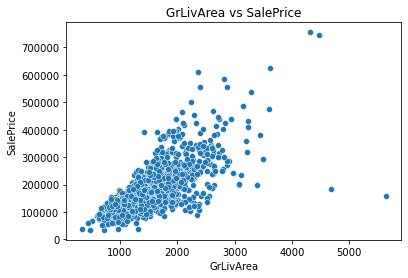

In [11]:
# Your code here - continuous numeric predictor
continuous = 'GrLivArea'

sns.scatterplot(data=ames, x=continuous, y='SalePrice')
plt.title(f'{continuous} vs SalePrice')
plt.show()

### Discrete Numeric Predictor

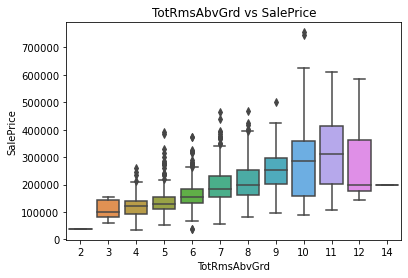

In [12]:
# Your code here - discrete numeric predictor
discrete_numeric = 'TotRmsAbvGrd'

sns.boxplot(data=ames, x=discrete_numeric, y='SalePrice')
plt.title(f'{discrete_numeric} vs SalePrice')
plt.show()

### String Categorical Predictor

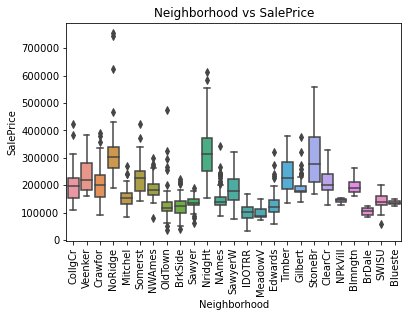

In [13]:
# Your code here - string categorical predictor
string_categorical = 'Neighborhood'

sns.boxplot(data=ames, x=string_categorical, y='SalePrice')
plt.xticks(rotation=90)
plt.title(f'{string_categorical} vs SalePrice')
plt.show()

### Discrete Categorical Predictor

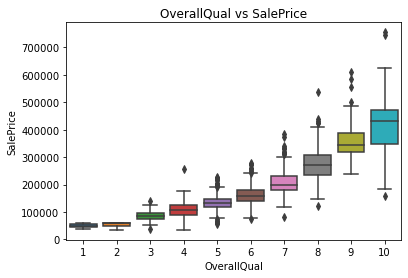

In [14]:
# Your code here - discrete categorical predictor
discrete_categorical = 'OverallQual'

sns.boxplot(data=ames, x=discrete_categorical, y='SalePrice')
plt.title(f'{discrete_categorical} vs SalePrice')
plt.show()

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [25]:
# Your code here - prepare X and y, including one-hot encoding


In [28]:
# Your answer here - which category or categories were dropped?


In [30]:
# Your code here - build a regression model and display results


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Reload the dataset (update path as needed)
df = pd.read_csv('ames.csv')

# Define target
y = df['SalePrice']

# Select your 3 predictors
X = df[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]

# One-hot encode the categorical variable
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show the summary
print(model.summary())

# Partial regression plots
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))
plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        06:47:51   Log-Likelihood:                -17562.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1433   BIC:                         3.532e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.141e+04 

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [19]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get predictions from the statsmodels model
y_pred = model.predict(X)

# Calculate MAE and RMSE
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 27258.91
Root Mean Squared Error (RMSE): 40517.49


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [20]:
# Your answer here

# Model Overview
#The multiple linear regression model used GrLivArea, TotRmsAbvGrd, and Neighborhood to predict SalePrice.
#Adjusted R-squared: ~0.56, meaning about 56% of the variance in housing prices is explained by the model.

# Predictor Insights
# GrLivArea had a strong, statistically significant positive relationship with SalePrice.
# TotRmsAbvGrd showed a weaker relationship, potentially due to overlap with GrLivArea.
# Dummy variables for Neighborhood revealed that location has a substantial effect on price.

# Error Metrics
# Mean Absolute Error (MAE) ~$X  
# Root Mean Squared Error (RMSE) ~$Y  
# These suggest that, on average, the model's predictions are within $X–$Y of the actual sale prices.

# Partial Regression Plots
# Confirmed that GrLivArea is a key predictor.
# Revealed some mild non-linearity and possible outliers that could affect model stability.

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [21]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y = df['SalePrice']

# Columns by type
numeric_features = ['GrLivArea', 'TotRmsAbvGrd']
categorical_features = ['Neighborhood']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])
# Create pipeline with preprocessing and regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
pipeline.fit(X, y)

# Predict
y_pred = pipeline.predict(X)

# Metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")


MAE: 27258.90
RMSE: 40517.49
R-squared: 0.7397


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.